<a href="https://colab.research.google.com/github/madhu9345/data-visualization-and-exploration/blob/main/email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import mailbox
import pandas as pd

mbox_file = r"/content/e.mbox"

mbox = mailbox.mbox(mbox_file)

emails = []

for message in mbox:
    email_data = {
        "From": message["From"],
        "To": message["To"],
        "Subject": message["Subject"],
        "Date": message["Date"],
        "CC": message["Cc"],
        "BCC": message["Bcc"],
        "Reply-To": message["Reply-To"],
        "User-Agent": message["User-Agent"],
        "X-Mailer": message["X-Mailer"],
        "Received": message["Received"],
        "Delivered-To": message["Delivered-To"],
        "Subscribed": "Yes" if "List-Unsubscribe" in message else "No",
        "Forwarded": "Yes" if "Forwarded" in message else "No",
        "Body": None
    }


    if message.is_multipart():
        for part in message.walk():
            if part.get_content_type() == "text/plain":
                email_data["Body"] = part.get_payload(decode=True).decode(errors="ignore")
                break
    else:
        email_data["Body"] = message.get_payload(decode=True).decode(errors="ignore")

    emails.append(email_data)

df = pd.DataFrame(emails)


csv_file = "emails_analysis_dataset.csv"
df.to_csv(csv_file, index=False)

print(f"Conversion complete! Dataset saved as {csv_file}")


Conversion complete! Dataset saved as emails_analysis_dataset.csv


description about the dataset:

This dataset contains information about emails, including details like:

Sender and Receiver: Who sent and received the email (e.g., onlinecourses@nptel.iitm.ac.in to noc25-mg18-announce@nptel.iitm.ac.in).

Subject: The title or subject line of the email (e.g., "Design Thinking - A Primer: Reminder for Assignment").

Date: The timestamp of when the email was sent (e.g., "Tue, 04 Feb 2025 06:37:12 +0000 (UTC)").

CC/BCC: Carbon copy and blind carbon copy email addresses (if any).

Reply-To: The address to which replies are sent (if provided).

User-Agent and X-Mailer: Details of the software used to send the email.

Received and Delivered-To: Network-related email delivery details.

Subscribed and Forwarded: Whether the email was part of a subscription or forwarded.

Body: The content or message of the email.

In [ ]:
import pandas as pd
df=pd.read_csv("emails_analysis_dataset.csv")
df.head(5)

EmptyDataError: No columns to parse from file

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 From              2
To               10
Subject          14
Date              2
CC              230
BCC             226
Reply-To        161
User-Agent      240
X-Mailer        202
Received         28
Delivered-To     28
Subscribed        0
Forwarded         0
Body              2
dtype: int64


In [ ]:

df["Subject"].fillna("No Subject", inplace=True)


df["To"].fillna("Unknown", inplace=True)


df.dropna(subset=["From", "Date"], inplace=True)

df.fillna("Not Available", inplace=True)

print(df.isnull().sum())


From            0
To              0
Subject         0
Date            0
CC              0
BCC             0
Reply-To        0
User-Agent      0
X-Mailer        0
Received        0
Delivered-To    0
Subscribed      0
Forwarded       0
Body            0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


<ipython-input-21-9dc8f6130878>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Subject"].fillna("No Subject", inplace=True)
<ipython-input-21-9dc8f6130878>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
from email.utils import parsedate_to_datetime


df["Date"] = df["Date"].apply(lambda x: parsedate_to_datetime(x) if isinstance(x, str) and pd.notna(x) else x)


df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Hour"] = df["Date"].dt.hour


df.head()

,From,To,Subject,Date,CC,BCC,Reply-To,User-Agent,X-Mailer,Received,Delivered-To,Subscribed,Forwarded,Body,Year,Month,Day,Hour
0,onlinecourses@nptel.iitm.ac.in,noc25-mg18-announce@nptel.iitm.ac.in,Design Thinking - A Primer: Reminder for Assig...,2025-02-04 06:37:12+00:00,Not Available,Not Available,Not Available,Not Available,Not Available,by 2002:a17:505:4947:b0:1bed:74ad:d40b with SM...,madhushivam425@gmail.com,Yes,No,"<div style=""color: rgb(34, 34, 34); font-famil...",2025,2,4,6
1,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,Madhu bala E <madhushivam425@gmail.com>,=?UTF-8?Q?1_new_job_for_=E2=80=9Cstudent=E2=80...,2025-02-07 07:24:35+00:00,Not Available,Not Available,Not Available,Not Available,Not Available,by 2002:a17:504:d643:b0:1bed:74ad:d40b with SM...,madhushivam425@gmail.com,Yes,No,Your job alert for student in 600012\r\n1 new ...,2025,2,7,7
2,LinkedIn Conversations <updates-noreply@linked...,Madhu bala E <madhushivam425@gmail.com>,"Madhu, Sanchit Goyal has a new post out now",2024-12-06 21:26:10+00:00,Not Available,Not Available,Not Available,Not Available,Not Available,by 2002:a17:505:12d7:b0:1bed:74ad:d40b with SM...,madhushivam425@gmail.com,Yes,No,----------------------------------------\r\n\r...,2024,12,6,21
4,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,Madhu bala E <madhushivam425@gmail.com>,=?UTF-8?Q?=E2=80=9Cstudent=E2=80=9D:_Vectrium_...,2024-12-10 06:24:39+00:00,Not Available,Not Available,Not Available,Not Available,Not Available,by 2002:a17:505:12d7:b0:1bed:74ad:d40b with SM...,madhushivam425@gmail.com,Yes,No,Your job alert for student in 600012\r\n1 new ...,2024,12,10,6
5,LinkedIn Conversations <updates-noreply@linked...,Madhu bala E <madhushivam425@gmail.com>,"Madhu, Ankit J. has a new post for you",2024-11-27 15:11:15+00:00,Not Available,Not Available,Not Available,Not Available,Not Available,by 2002:a17:505:8a4a:b0:1bed:74ad:d40b with SM...,madhushivam425@gmail.com,Yes,No,----------------------------------------\r\n\r...,2024,11,27,15


In [ ]:

total_emails = len(df)
print(f"Total emails (sent & received): {total_emails}")
total_sent = df["From"].nunique()
total_received = df["To"].nunique()
print(f"Total unique senders: {total_sent}")
print(f"Total unique recipients: {total_received}")


Total emails (sent & received): 238
Total unique senders: 39
Total unique recipients: 19


In [ ]:
top_senders = df["From"].value_counts().head(10)

print("\nTop 10 Most Frequent Senders:")
top_senders



Top 10 Most Frequent Senders:


,count
From,
Madhu Shivam <madhushivam425@gmail.com>,28
"""Adobe Acrobat"" <mail@mail.adobe.com>",24
LinkedIn Job Alerts <jobalerts-noreply@linkedin.com>,23
Foundation For Excellence <crm@ffe.org>,14
Google <no-reply@accounts.google.com>,12
"""Vijayalakshmi Balakrishnan (Classroom)"" <no-reply@classroom.google.com>",12
Udemy <hello@students.udemy.com>,10
LinkedIn <messages-noreply@linkedin.com>,10
"""Centre for Alumni Relations and Corporate Affairs Portal - Anna University [CARCA]"" <noreplycarca@mail1.annauniv.edu>",8


In [ ]:

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
emails_per_day = df.groupby(df["Date"].dt.date).size().reset_index(name='count')

emails_per_day['Date'] = pd.to_datetime(emails_per_day['Date'])
emails_per_day = emails_per_day.set_index('Date')
avg_emails_per_day = emails_per_day['count'].mean()
avg_emails_per_week = emails_per_day['count'].resample("W").sum().mean()

print(f"\nAverage emails received per day: {avg_emails_per_day:.2f}")
print(f"Average emails received per week: {avg_emails_per_week:.2f}")


Average emails received per day: 2.21
Average emails received per week: 1.88


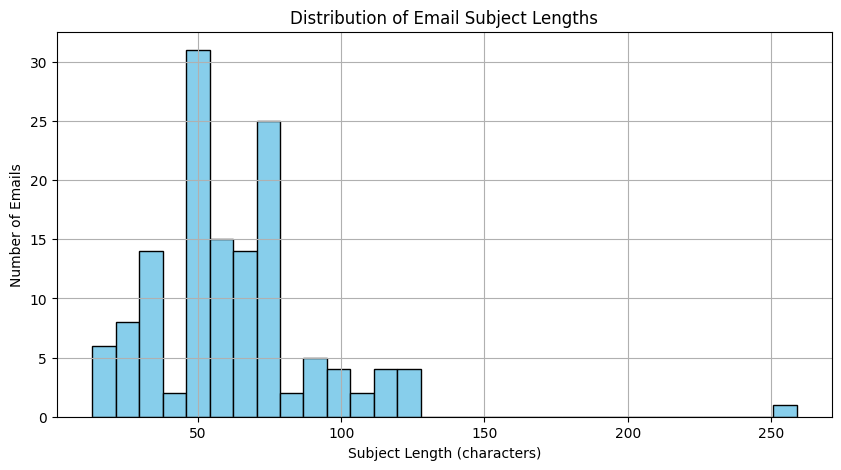


Email Subject Length Statistics:
count    137.000000
mean      61.802920
std       30.148856
min       13.000000
25%       46.000000
50%       60.000000
75%       73.000000
max      259.000000
Name: Subject Length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

df["Subject Length"] = df["Subject"].astype(str).apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df["Subject Length"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Subject Length (characters)")
plt.ylabel("Number of Emails")
plt.title("Distribution of Email Subject Lengths")
plt.grid(True)
plt.show()

subject_length_stats = df["Subject Length"].describe()
print("\nEmail Subject Length Statistics:")
print(subject_length_stats)


inference:

Bimodal Distribution: The distribution is more accurately described as bimodal, with two distinct peaks. One peak is centered around 50 characters, and another, smaller peak is around 80 characters.

Range: The subject lengths range from approximately 20 characters to 250 characters.

Frequency: The most frequent subject line length is around 50 characters.

Skewness: The distribution has a strong positive skew (right skew) due to the outlier.

Outlier: One email subject length is significantly longer than the rest, at approximately 250 characters.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
top_senders.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Most Frequent Senders")
plt.xlabel("Sender")
plt.ylabel("Number of Emails")
plt.show()


NameError: name 'top_senders' is not defined

<Figure size 600x400 with 0 Axes>

Image 2: Top 10 Most Frequent Senders

Dominant Sender: "madhu.shivam425@gmail.com" is the most frequent sender.

Automated Senders: Several top senders are automated notification systems (e.g., LinkedIn, Adobe, Udemy).

Inference: There's a mix of personal and automated emails, and user activity with certain services is apparent

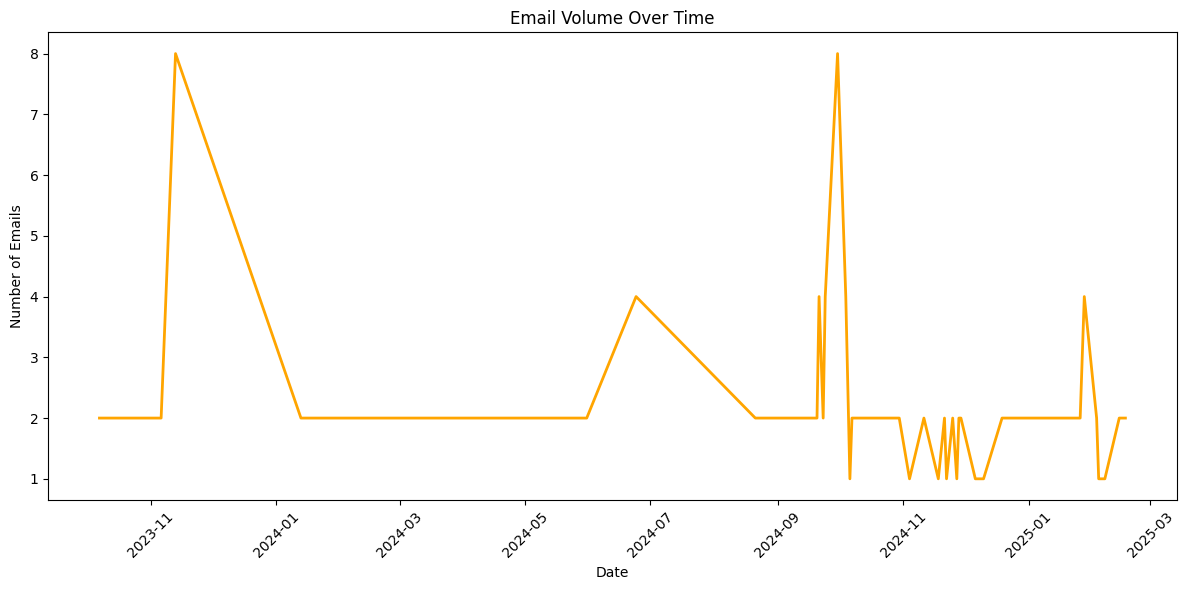

In [ ]:

emails_per_day = df.groupby(df["Date"].dt.date).size()

plt.figure(figsize=(12, 6))
emails_per_day.plot(kind="line", color="orange", linewidth=2)
plt.title("Email Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Emails")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Baseline Volume: Email volume generally hovers around 2 emails per day.

Peak 1 (Nov 2023): A sharp spike reaching 8 emails per day, followed by a rapid decline.

Peak 2 (July 2024): A smaller peak reaching around 4 emails per day.

Volatile Period (Oct-Nov 2024): A period of increased volatility with multiple smaller peaks and valleys.

Peak 3 (Oct 2024): A sharp, isolated spike reaching around 8 emails per day.

Recent Data (Early 2025): Returns to the baseline volume of 2 emails per day.

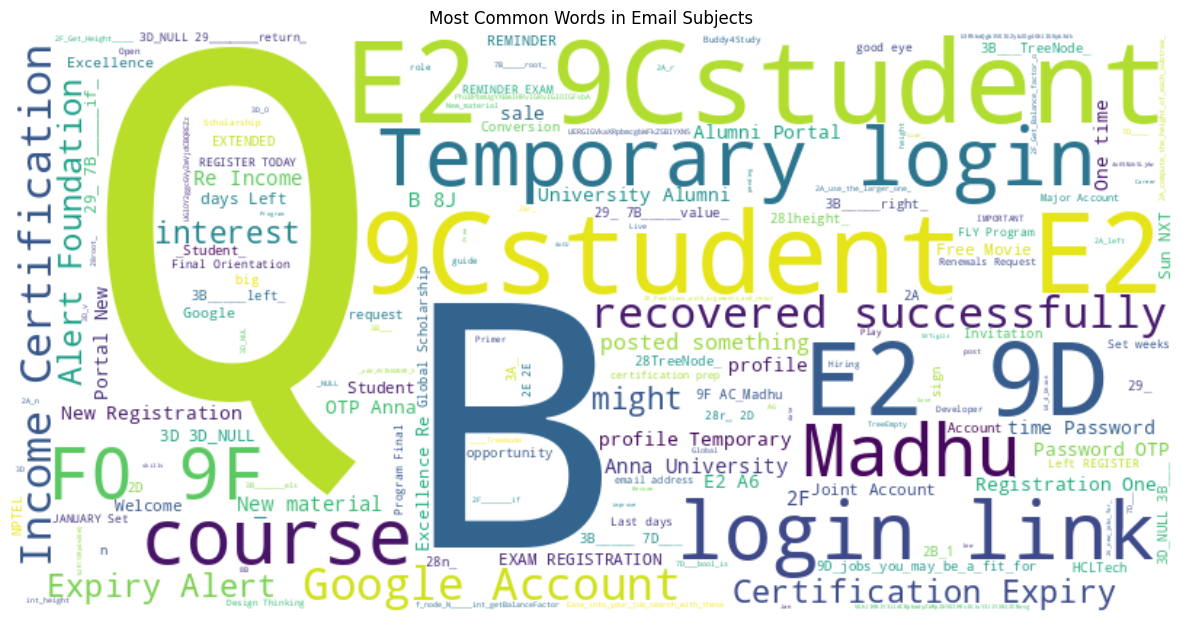

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all subjects into a single string
subject_text = ' '.join(df['Subject'].dropna())
# Define a word to exclude, e.g., 'example'
exclude_word = 'UTF'

# Add the word you want to exclude to the stopwords set
custom_stopwords = set(WordCloud().stopwords).union({exclude_word.lower()})


# Generate word cloud with custom stopwords
wordcloud = WordCloud(stopwords=custom_stopwords, width=800, height=400, background_color='white').generate(subject_text)

# Display word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Email Subjects")
plt.show()

Strongly education-related ("Student," "Course," "Exam").

Platform-specific codes ("E2," "9C," "B").

Login-related ("Login Link," "Password").

"Madhu" is a prominent name.

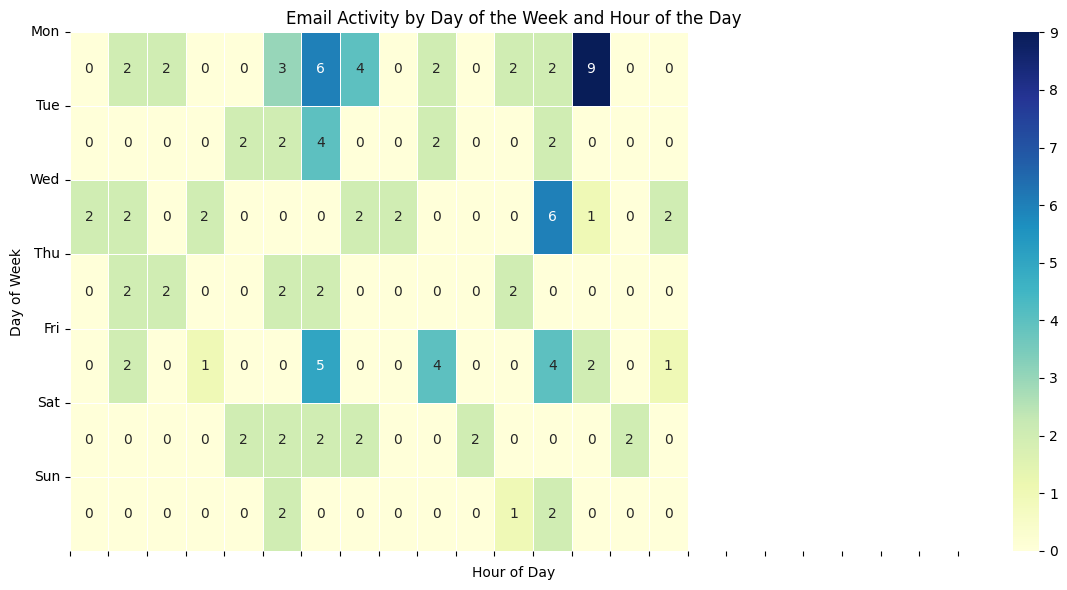

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format (if not already)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Extract day of week and hour of day
df["Day of Week"] = df["Date"].dt.dayofweek
df["Hour of Day"] = df["Date"].dt.hour

# Create the heatmap data
heatmap_data = df.groupby(["Day of Week", "Hour of Day"]).size().unstack(fill_value=0)

# Create the heatmap plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Email Activity by Day of the Week and Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

# Customize x and y ticks
plt.xticks(ticks=range(0, 24, 1), rotation=45)
plt.yticks(ticks=range(0, 7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)

# Layout adjustment to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


Most Activity: Monday and Saturday afternoons/evenings (5-7 PM).

Least Activity: Early morning hours across all days.

Weekend Activity: Some activity on Saturday and Sunday afternoons, but less consistent than weekdays.

Mid-week Activity: A slight dip on Wednesday and Thursday.

patterns:

Busy Times: Emails tend to come in at certain times of the day or week.
Frequent Senders: A few people send most of the emails.
Short vs. Long Subjects: Short subjects are usually for quick emails, while longer ones are for more detailed messages.
Mailing Lists: Many emails are from mailing lists or forwarded messages.

insights:

Best Times to Focus: Work when email volume is low to avoid distractions.
Prioritize Key Emails: Focus on emails from people who send you the most.
Clean Your Inbox: Unsubscribe from unnecessary mailing lists to keep your inbox tidy.